Программа получает на вход файлы из папки, в которых содержатся данные для построения графиков, отрисовывает каждый график и по надобности сохраняет его. Дополнительно увеличение по временному масштабу 100 нс, 1 мкс, 10 мкс.  
_______
**Названия рисунков**  
AAA.A_CCC_D_E_10us.png 
AAA.A – Толщина образца и порядковый номер (400.1)  
BBBBBB – День эксперимента  - день месяц год(060924)  
CCC – Номер эксперимента (001)  
D – Количество импульсов(1)  
E – Энергия в импульсе нДж (5)  
F - Увеличение(10us)  
____
**Пример** получившегося названия:  
400.1.060924.001.1.5.png

#### Задачи:
- Доступ к общей таблице
- Увеличение графиков
- Название файлов
- Перевод в Вт
- Начало с какого файла
- Обрабатывать новые файлы в режиме реального времени
- Производить увеличение второго графика спустя задержку ~80нс плюс отступ назад 5нс, и от этой точки взять 100 нс, 1 мкс или 10 мкс

In [ ]:
!pip install pandas matplotlib openpyxl

Tek010_ALL.csv


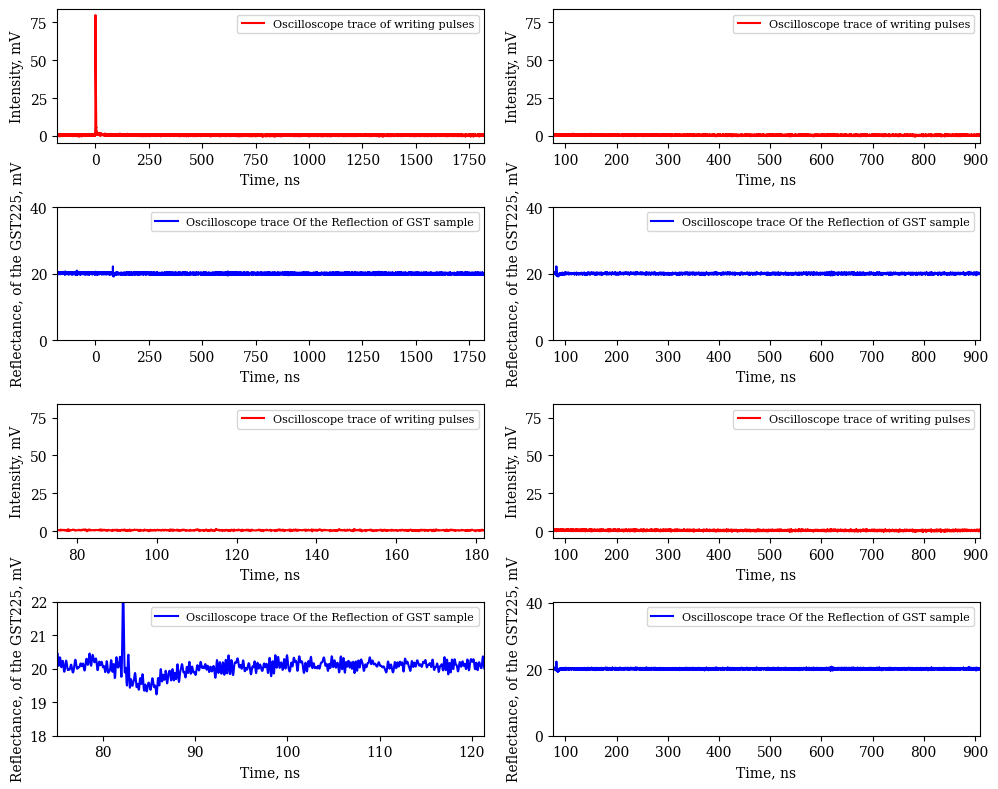

KeyboardInterrupt: Interrupted by user

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np

# start_file = 'shot18.csv' # Rigol
start_file = 'Tek010_ALL.csv' # Tektronix

dir = 'waveforms/110924/' # папка с осциллограммами
# dir = 'waveforms/060924/Осциллограммы переходов/' # папка с осциллограммами
general_file = 'waveforms/060924/General.xlsx'
files = sorted(os.listdir(dir))

csv_files_all = [file for file in files if (file.endswith('.csv'))]
csv_files = [file for file in csv_files_all if (file.startswith('shot') or file.startswith('Tek'))]

df_gen = pd.read_excel(general_file)
col_index = df_gen.columns.get_loc('Общая энергия, нДж')
df_gen = df_gen.iloc[:, :col_index+1]



def plot_graph():
    plt.figure(figsize=(10, 8))
    plt.rcParams["font.family"] = "serif" # font

    # 1) Без увеличения
    plt.subplot(4, 2, 1)
    plt.xlim(df.iloc[0, 0]*1e9, df.iloc[-1, 0]*1e9)
    plt.ylabel('Intensity, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH1']*1e3, color='red', 
             label='Oscilloscope trace of writing pulses')
    plt.legend(fontsize=8)

    plt.subplot(4, 2, 3)
    plt.xlim(df.iloc[0, 0]*1e9, df.iloc[-1, 0]*1e9)
    plt.ylim(0, df['CH2'].mean()*1e3 * 2 )
    plt.ylabel('Reflectance, of the GST225, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH2']*1e3, color='blue',
             label='Oscilloscope trace Of the Reflection of GST sample')
    plt.legend(fontsize=8)


    # 2) Увеличение в 2 раза
    plt.subplot(4, 2, 2)
    plt.xlim((0+80-5), df.iloc[-1, 0]*1e9 / 2)
    plt.ylabel('Intensity, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH1']*1e3, color='red', 
             label='Oscilloscope trace of writing pulses')
    plt.legend(fontsize=8)


    plt.subplot(4, 2, 4)
    plt.xlim((0+80-5), df.iloc[-1, 0]*1e9 / 2)
    plt.ylim(0, df['CH2'].mean()*1e3 * 2 )
    plt.ylabel('Reflectance, of the GST225, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH2']*1e3, color='blue',
             label='Oscilloscope trace Of the Reflection of GST sample')
    plt.legend(fontsize=8)


    # 3) Увеливение в 10 раз
    plt.subplot(4, 2, 5)
    plt.xlim((0+80-5), df.iloc[-1, 0]*1e9/10)
    plt.ylabel('Intensity, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH1']*1e3, color='red', 
             label='Oscilloscope trace of writing pulses')
    plt.legend(fontsize=8)

    plt.subplot(4, 2, 7)
    plt.xlim((0+80-5), df.iloc[-1, 0]*1e9/15)
    plt.ylim(18, 22)
    plt.ylabel('Reflectance, of the GST225, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH2']*1e3, color='blue',
             label='Oscilloscope trace Of the Reflection of GST sample')
    plt.legend(fontsize=8)

    plt.axhline(y=5, color='black', linestyle='--')
    # 4) Увеливение в
    plt.subplot(4, 2, 6)
    plt.xlim((0+80-5), df.iloc[-1, 0]*1e9 / 2)
    plt.ylabel('Intensity, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH1']*1e3, color='red', 
             label='Oscilloscope trace of writing pulses')
    plt.legend(fontsize=8)

    plt.subplot(4, 2, 8)
    plt.xlim((0+80-5), df.iloc[-1, 0]*1e9 / 2)
    plt.ylim(0, df['CH2'].mean()*1e3 * 2 )
    plt.ylabel('Reflectance, of the GST225, mV')
    plt.xlabel('Time, ns')
    plt.plot(df['TIME']*1e9, df['CH2']*1e3, color='blue',
             label='Oscilloscope trace Of the Reflection of GST sample')
    plt.legend(fontsize=8)

    plt.tight_layout()  # Автоматическая регулировка расстояния между графиками
    


for file in csv_files:
    file = start_file
    path = dir + file

    # Для пропуска любой "Шапки" файла
    f = open(path, 'r')
    lines = f.readlines()
    skip_lines = next(i for i, line in enumerate(lines) 
                  if 'TIME' in line or 'Time(s)' in line)

    # exp_number = file.replace('Tek', '')
    # exp_number = exp_number.replace('_ALL.csv', '')
    # print("Num:", exp_number)
    

    column_names = ['TIME', 'CH1', 'CH2', 'CH3']
    df = pd.read_csv(path, skiprows=skip_lines+1, header=None, names=column_names)
    df = df.drop('CH3', axis=1)
    df.replace([np.inf, -np.inf], np.nan, inplace=True) # Если есть значения Inf
    

    print(file)
    plot_graph()
    plt.show()

    save = input('Save?(y or n): ')
    if(save == 'y'): 
        plot_graph()
        plt.savefig('009.png', dpi=300, bbox_inches='tight')

    plt.close()

    